In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# Importing Data 

In [2]:
newCustomerData = pd.read_csv('C:/Users/LDW/Documents/GitHub/SC1015-Group9/dataset/customerData_Clean.csv')
newCustomerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,806,25,1950
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,9,6,1950
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,287,21,1960
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,34,8,1980
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2203,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,0,267,18,1960
2204,2204,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,0,30,22,1940
2205,2205,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,0,297,19,1980
2206,2206,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,0,324,23,1950


# Formalizing Variable Types

In [3]:
newCustomerData['NumWebVisitsMonth'] = newCustomerData['NumWebVisitsMonth'].astype("category")
newCustomerData['YearRange'] = newCustomerData['YearRange'].astype("category")
newCustomerData['Dt_Customer'] = newCustomerData['Dt_Customer'].astype("datetime64[ns]")

In [4]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-nul

In [5]:
newCustomerData.describe()

,Unnamed: 0,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1103.500000,1968.750000,51373.153080,0.448822,0.509058,49.236413,302.744565,26.211051,162.017663,37.176178,...,5.802989,0.073370,0.071558,0.067935,0.061141,0.013134,0.009511,0.145833,225.404891,14.791667
std,637.539018,11.976226,20224.668686,0.539436,0.543453,28.910457,335.390790,39.660005,212.636636,54.189102,...,3.230694,0.260801,0.257813,0.251691,0.239644,0.113875,0.097081,0.353019,275.965434,7.584001
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,551.750000,1959.000000,35376.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,8.000000
50%,1103.500000,1970.000000,51111.000000,0.000000,0.000000,50.000000,173.500000,8.000000,66.000000,12.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.500000,15.000000
75%,1655.250000,1977.000000,67560.750000,1.000000,1.000000,74.000000,503.250000,33.000000,226.250000,50.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,348.750000,21.000000
max,2207.000000,1996.000000,94384.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,...,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1306.000000,39.000000


In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

customerData = pd.read_csv('C:/Users/LDW/Documents/GitHub/SC1015-Group9/dataset/train_data.csv')
colOfNum = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']
colOfCat = ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']
print("Column of numerical data:",colOfNum)
print()
print("Column of categorical data:",colOfCat)
# Column of numerical data: ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']
# Column of categorical data: ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)

# initialise variables
edu, ms, dtCus, yr, ac3, ac4, ac5, ac1, ac2, com, res, kid, teen =\
[pd.DataFrame(newCustomerData[categories]) for categories in colOfCat]

edu_dict, ms_dict, dtCus_dict, yr_dict, ac3_dict, ac4_dict,\
ac5_dict, ac1_dict, ac2_dict, com_dict, res_dict, kid_dict,\
teen_dict = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}

var_list = [edu, ms, dtCus, yr, ac3, ac4, ac5, ac1, ac2, com, res, kid, teen]
dict_list = [edu_dict, ms_dict, dtCus_dict, yr_dict, ac3_dict, ac4_dict,\
ac5_dict, ac1_dict, ac2_dict, com_dict, res_dict, kid_dict, teen_dict]


def make_dict(a_dict, data, onehot):
    for i in range(len(data)):
        key = data[i][0]
        value = onehot[i]
        a_dict[key] = value

def prepare_data(category):
    category = category.squeeze()
    category = pd.unique(category)
    data = [[elements] for elements in category]
    data = asarray(data)
    return data

for i in range(len(dict_list)):
    data = prepare_data(var_list[i])
    onehot = encoder.fit_transform(data)
    make_dict(dict_list[i], data, onehot)

Column of numerical data: ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase']

Column of categorical data: ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']


In [7]:
newCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2208 non-null   int64         
 1   Year_Birth           2208 non-null   int64         
 2   Education            2208 non-null   object        
 3   Marital_Status       2208 non-null   object        
 4   Income               2208 non-null   float64       
 5   Kidhome              2208 non-null   int64         
 6   Teenhome             2208 non-null   int64         
 7   Dt_Customer          2208 non-null   datetime64[ns]
 8   Recency              2208 non-null   int64         
 9   MntWines             2208 non-null   int64         
 10  MntFruits            2208 non-null   int64         
 11  MntMeatProducts      2208 non-null   int64         
 12  MntFishProducts      2208 non-null   int64         
 13  MntSweetProducts     2208 non-nul

# Visualization 

<Figure size 144x432 with 0 Axes>

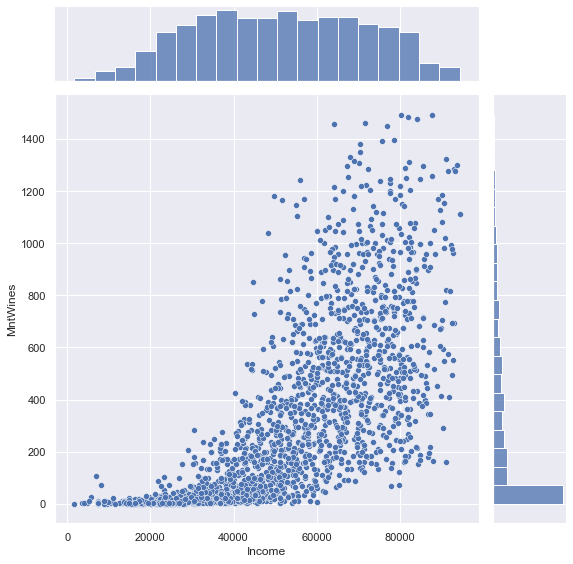

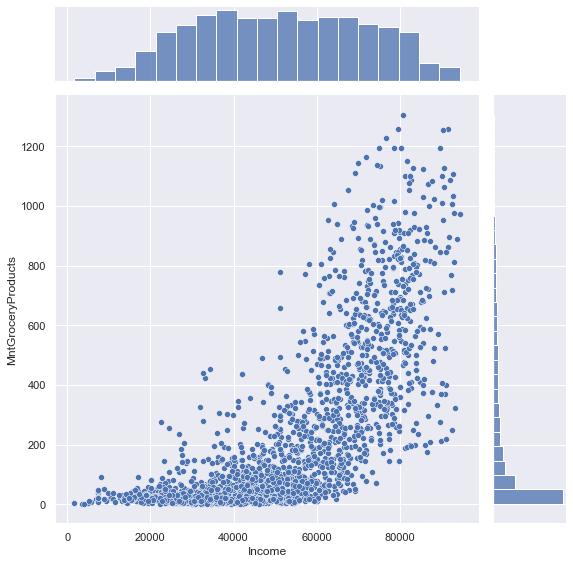

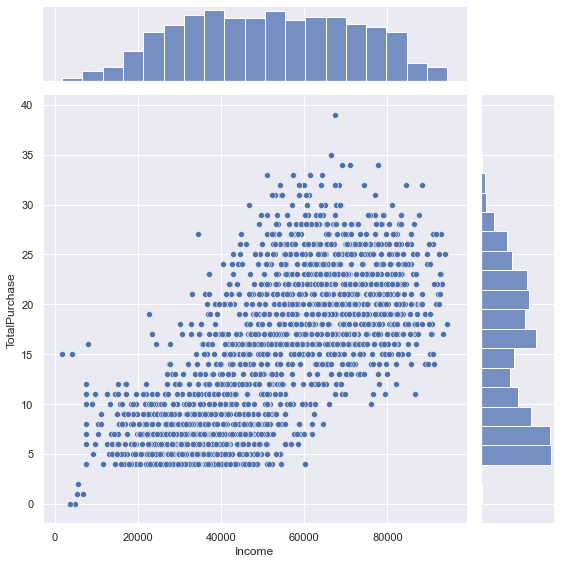

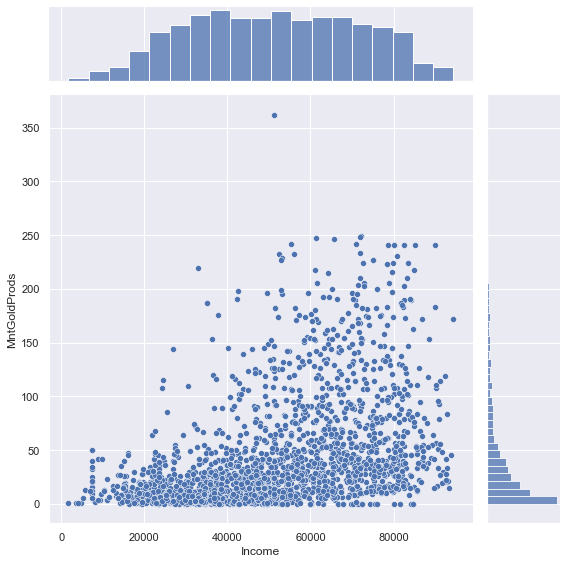

In [8]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = newCustomerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "TotalPurchase", height = 8)
sb.jointplot(data = newCustomerData, x = "Income", y = "MntGoldProds", height = 8)

<AxesSubplot:>

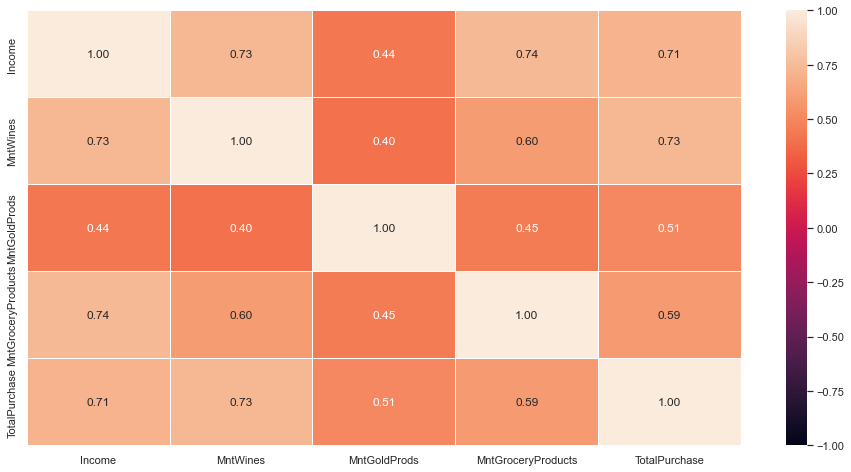

In [9]:
f = plt.figure(figsize=(16, 8))
sb.heatmap(newCustomerData[['YearRange', 'Education', 'Marital_Status', 
                            'Income','MntWines','MntGoldProds',
                            'NumWebVisitsMonth','MntGroceryProducts',
                            'TotalPurchase']].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", linewidths=.5)

In [10]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
customerData_cat = newCustomerData[['NumWebVisitsMonth','YearRange']]
ohe.fit(customerData_cat)
customerData_cat_ohe = pd.DataFrame(ohe.transform(customerData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(customerData_cat.columns))

# Check the encoded variables
customerData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   NumWebVisitsMonth_0   2208 non-null   float64
 1   NumWebVisitsMonth_1   2208 non-null   float64
 2   NumWebVisitsMonth_2   2208 non-null   float64
 3   NumWebVisitsMonth_3   2208 non-null   float64
 4   NumWebVisitsMonth_4   2208 non-null   float64
 5   NumWebVisitsMonth_5   2208 non-null   float64
 6   NumWebVisitsMonth_6   2208 non-null   float64
 7   NumWebVisitsMonth_7   2208 non-null   float64
 8   NumWebVisitsMonth_8   2208 non-null   float64
 9   NumWebVisitsMonth_9   2208 non-null   float64
 10  NumWebVisitsMonth_10  2208 non-null   float64
 11  NumWebVisitsMonth_13  2208 non-null   float64
 12  NumWebVisitsMonth_14  2208 non-null   float64
 13  NumWebVisitsMonth_19  2208 non-null   float64
 14  NumWebVisitsMonth_20  2208 non-null   float64
 15  YearRange_1890       

# Machine Learning

In [24]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
Y = pd.DataFrame(newCustomerData['MntGroceryProducts'])
X = pd.DataFrame(newCustomerData['Income'])

# Split the Dataset into random Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

Train Set : (1766, 1) (1766, 1)
Test Set  : (442, 1) (442, 1)


In [27]:
# from sklearn.model_selection import train_test_split

# Extract Response and Predictors
totalPurchases = pd.DataFrame(newCustomerData['TotalPurchase'])
income = pd.DataFrame(newCustomerData['Income'])

# Split the Dataset into random Train and Test
income_train, income_test, totalPurchases_train, totalPurchases_test = train_test_split(income, totalPurchases, test_size = 0.2)

# Check the sample sizes
print("Train Set :", income_train.shape, totalPurchases_train.shape)
print("Test Set  :", income_test.shape, totalPurchases_test.shape)

Train Set : (1766, 1) (1766, 1)
Test Set  : (442, 1) (442, 1)


## Ridge Regression 

In [10]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = .5)
reg.fit(X_train, Y_train)
reg.coef_

array([[0.00990074]])

## Linear Regression (for reference) 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg1 = LinearRegression()
linreg1.fit(X_train, Y_train)

print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

Intercept 	: b =  [-298.70788293]
Coefficients 	: a =  [[0.01019645]]


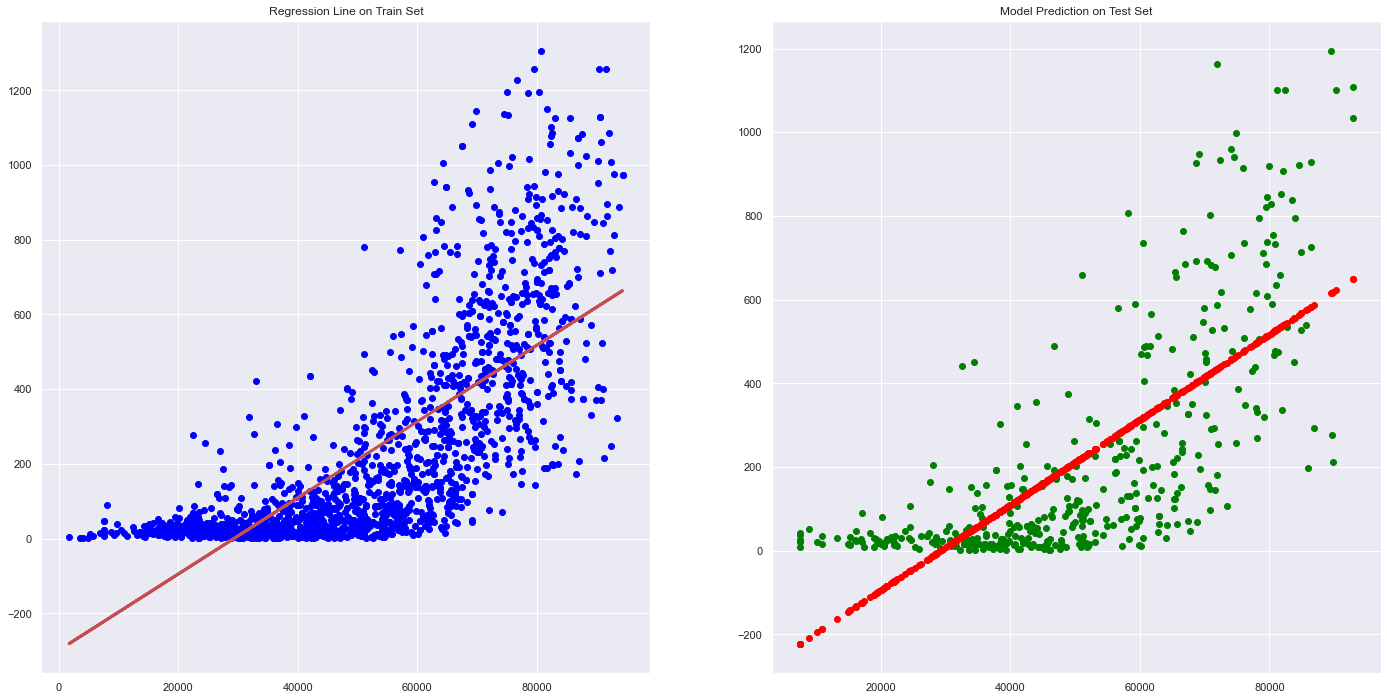

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5577095395975984
Mean Squared Error (MSE) 	: 34077.16971555338

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5089775579351438
Mean Squared Error (MSE) 	: 35460.724360267566

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 34077.16971555338

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 35460.724360267566



In [30]:
regline_x = X_train
regline_y = linreg1.intercept_ + linreg1.coef_ * X_train

# Predict Response corresponding to Predictors
Y_train_pred = linreg1.predict(X_train)
Y_test_pred = linreg1.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(X_train, Y_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'r', linewidth = 3)
axes[0].set_title("Regression Line on Train Set")
axes[1].scatter(X_test, Y_test, color = "green")
axes[1].scatter(X_test, Y_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_train, Y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X_test, Y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
print()

In [32]:
linreg2 = LinearRegression()
linreg2.fit(income_train, totalPurchases_train)

print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)

Intercept 	: b =  [1.00526016]
Coefficients 	: a =  [[0.00026926]]


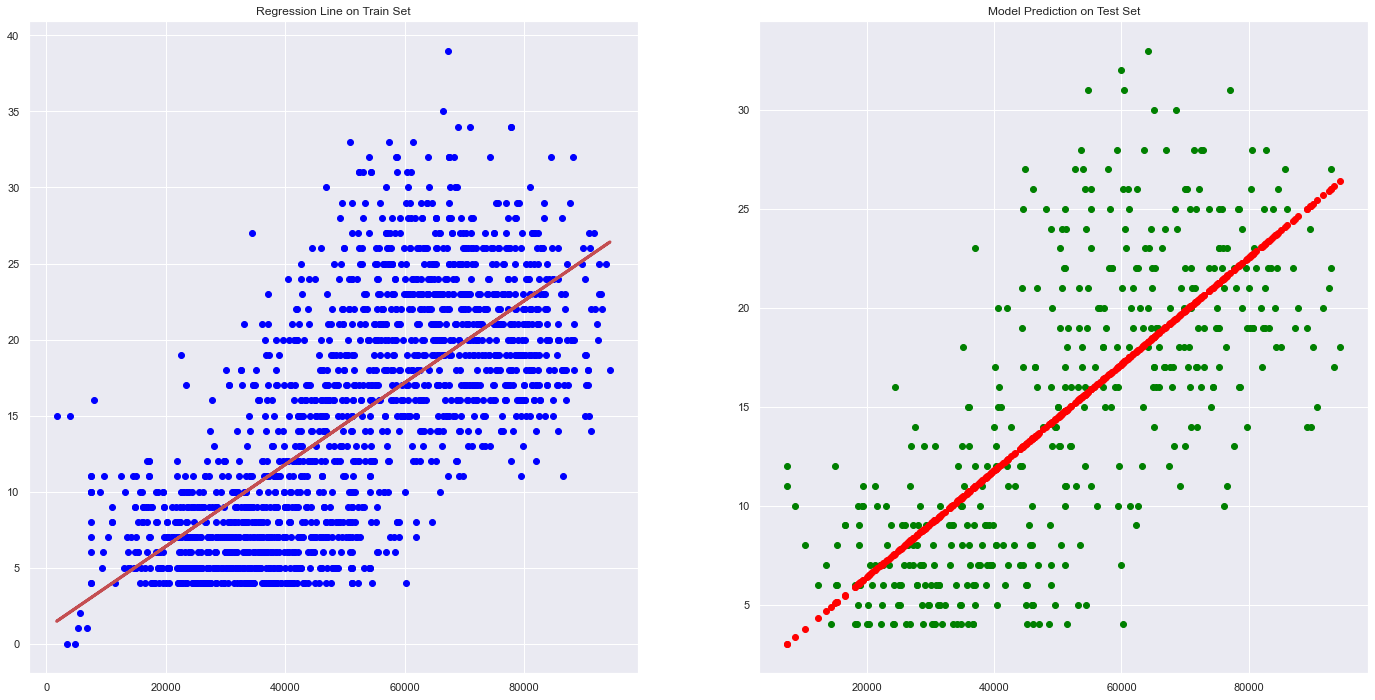

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5058671803805239
Mean Squared Error (MSE) 	: 28.86676249660111

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.48451613848855324
Mean Squared Error (MSE) 	: 27.716769643015454

Prediction Accuracy of Model 	Train Dataset
Mean Squared Error (MSE) 	: 28.86676249660111

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 27.716769643015454



In [34]:
regline_x = income_train
regline_y = linreg2.intercept_ + linreg2.coef_ * income_train

# Predict Response corresponding to Predictors
totalPurchases_train_pred = linreg2.predict(income_train)
totalPurchases_test_pred = linreg2.predict(income_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(income_train, totalPurchases_train, color = "blue")
axes[0].plot(regline_x, regline_y, 'r', linewidth = 3)
axes[0].set_title("Regression Line on Train Set")
axes[1].scatter(income_test, totalPurchases_test, color = "green")
axes[1].scatter(income_test, totalPurchases_test_pred, color = "red")
axes[1].set_title("Model Prediction on Test Set")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_train, totalPurchases_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg2.score(income_test, totalPurchases_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()
# Check the Goodness of Fit (on Train Data)
print("Prediction Accuracy of Model \tTrain Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_train, totalPurchases_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(totalPurchases_test, totalPurchases_test_pred))
print()

## Exponential Regression 

In [14]:
X = np.array(newCustomerData['Income'])
print(X)
Y = np.array(newCustomerData['MntGroceryProducts'])
print(Y)

[58138 46344 71613 ... 56981 69245 52869]
[806   9 287 ... 297 324  66]


In [15]:
ylog_data = np.log(Y)
print(ylog_data)
  
curve_fit = np.polyfit(X, ylog_data, 1)
print(curve_fit)

[6.69208374 2.19722458 5.65948222 ... 5.69373214 5.78074352 4.18965474]
[6.00146653e-05 1.37938297e+00]


In [16]:
y = np.exp(1.37938297e+00) * np.exp(6.00146653e-05*X)
  
print(y)

[130.12760959  64.11655627 292.13417382 ... 121.39851102 253.4327416
  94.85015303]


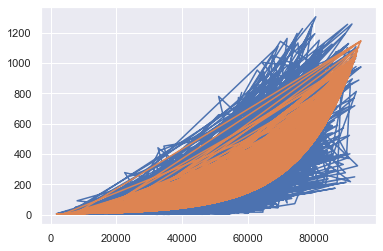

In [17]:
# Blue 
plt.plot(X, Y)
  
# best fit in orange
plt.plot(X, y)